# Importing Libraries

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing File

In [119]:
df = pd.read_excel("netflix.xlsx")
df.head()

,Type,Title,Director,Cast,Country,Release_year,Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ..."


# Exploratory Data Analysis & Data Cleaning

In [120]:
df.shape

(8807, 7)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          8807 non-null   object
 1   Title         8807 non-null   object
 2   Director      6173 non-null   object
 3   Cast          7982 non-null   object
 4   Country       7976 non-null   object
 5   Release_year  8807 non-null   int64 
 6   Genres        8807 non-null   object
dtypes: int64(1), object(6)
memory usage: 481.8+ KB


In [122]:
df.isnull().sum()

Type               0
Title              0
Director        2634
Cast             825
Country          831
Release_year       0
Genres             0
dtype: int64

In [123]:
# Droping rows were all 3 values are missing

df.dropna(subset=['Director', 'Cast', 'Country'], how='all', inplace=True)
df.shape

(8711, 7)

In [124]:
# Impute missing values in the remaining rows with 'Unknown'

df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)

df.isnull().sum()

Type            0
Title           0
Director        0
Cast            0
Country         0
Release_year    0
Genres          0
dtype: int64

In [125]:
# Count of unique values in each column

for col in df:
    print(f'{col}: {df[col].nunique()}\n')

Type: 2

Title: 8711

Director: 4529

Cast: 7693

Country: 749

Release_year: 73

Genres: 512



In [126]:
# Displaying First few rows

df.head()

,Type,Title,Director,Cast,Country,Release_year,Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,Documentaries
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,"Crime TV Shows, International TV Shows, TV Act..."
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ..."
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021,"TV Dramas, TV Horror, TV Mysteries"


# Visualizations & Insights

# 1. Content type distribution: Netflix offers both movies and TV shows on its platform, A bar chart below shows the distribution of content types.

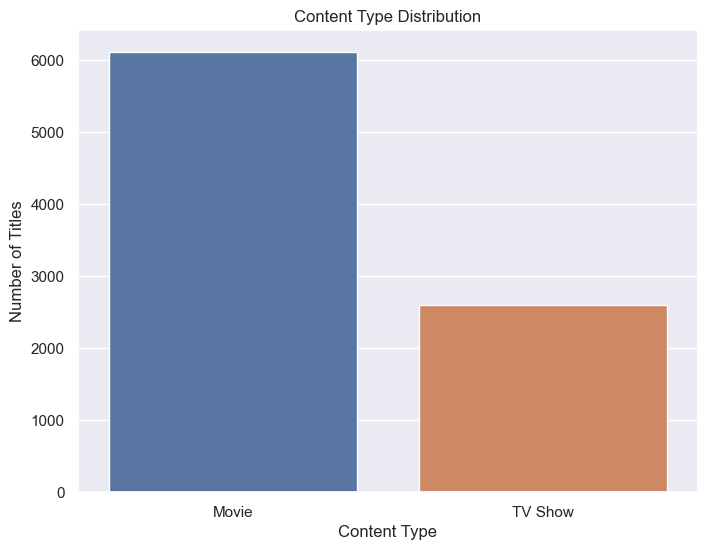

In [127]:
sns.set_style('darkgrid')

# Count the number of movies and TV shows
content_type_counts = df['Type'].value_counts()

# Plot the distribution
plt.figure(figsize=(8,6))
sns.barplot(x=content_type_counts.index, y=content_type_counts.values)
plt.title('Content Type Distribution')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.show()

# 2. Top countries with most content: Netflix offers content from many countries around the world, A horizontal bar chart below shows the top 10 countries with the most content on the platform.

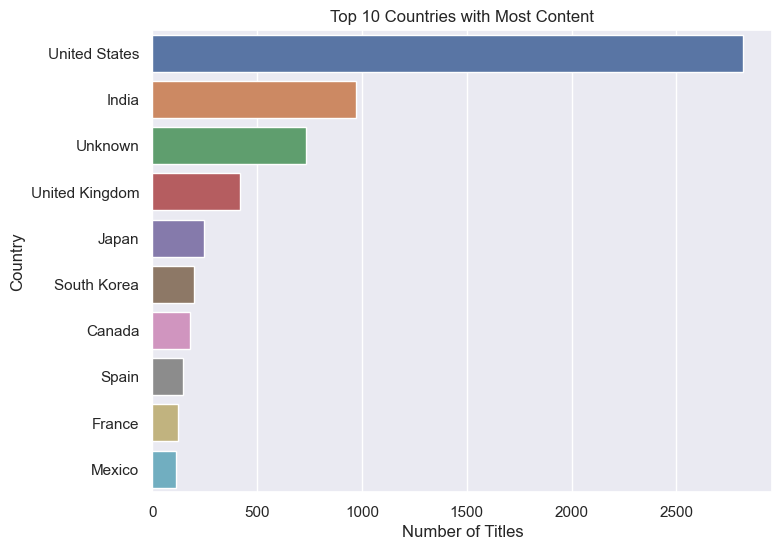

In [128]:
country_counts = df['Country'].value_counts().sort_values(ascending=False)[:10]

# Plot the distribution
plt.figure(figsize=(8,6))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

# 3. Distribution of release year: The release year of a title can indicate how recent or old it is, A histogram below shows the distribution of release years.

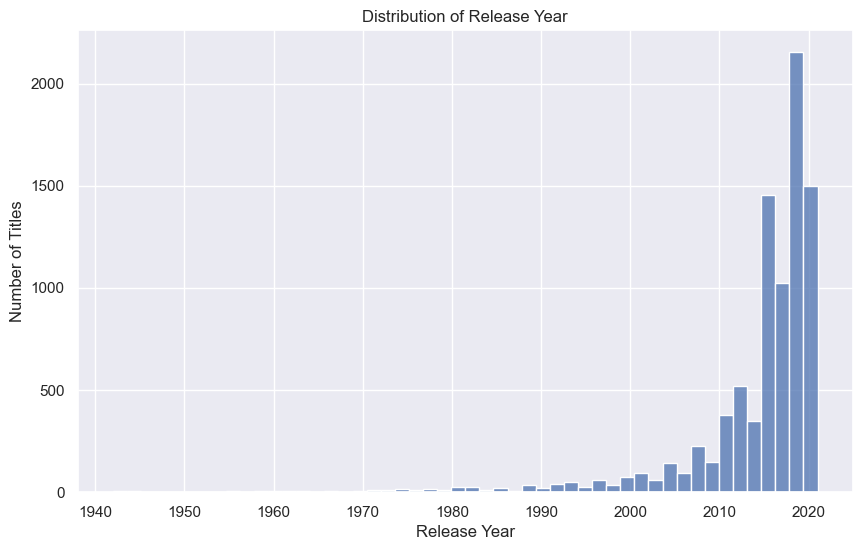

In [129]:
plt.figure(figsize=(10,6))
sns.histplot(df['Release_year'], bins=50)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

# 4. Distribution of release years of movies and TV shows on Netflix: A histogram below shows the distribution

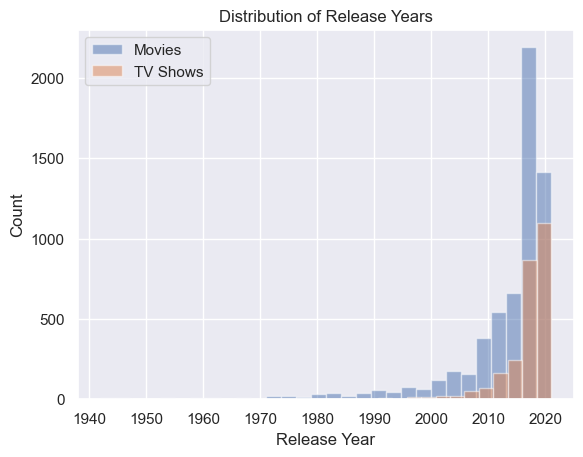

In [130]:
plt.hist(df[df['Type']=='Movie']['Release_year'], bins=30, alpha=0.5, label='Movies')
plt.hist(df[df['Type']=='TV Show']['Release_year'], bins=30, alpha=0.5, label='TV Shows')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Release Years')
plt.legend(loc='upper left')
plt.show()

# Question - Answering

# a. Which are the top 5 directors who produce most of the movies only?

In [131]:
# filter data to only include movies
movies = df[df['Type'] == 'Movie']

# count number of movies produced by each director
director_counts = movies['Director'].value_counts()

# select top 5 directors
top_directors = director_counts.head(5)

# print top directors
top_directors

Unknown                   171
Rajiv Chilaka              19
Raúl Campos, Jan Suter     18
Suhas Kadav                16
Marcus Raboy               15
Name: Director, dtype: int64

Visualization

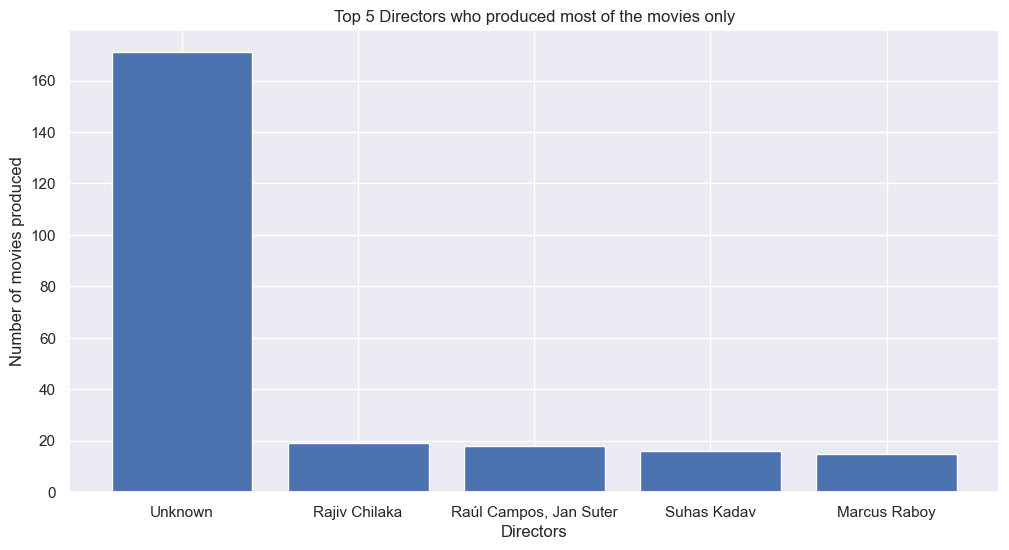

In [135]:
plt.figure(figsize=(12,6))
plt.bar(top_directors.index, top_directors.values)
plt.title('Top 5 Directors who produced most of the movies only')
plt.xlabel('Directors')
plt.ylabel('Number of movies produced')
plt.show()

# b. Which are the top 5 genres which are liked by people or here liking means listed on the portal of Netflix (you can find a count for each genre and list the top 5 genres) for movies and TV shows?

In [91]:
# count number of times each genre appears
genre_counts = df['Genres'].value_counts()

# select top 5 genres
top_genres = genre_counts.head(5)

# print top genres
top_genres

Dramas, International Movies                        362
Documentaries                                       357
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: Genres, dtype: int64

Visualization

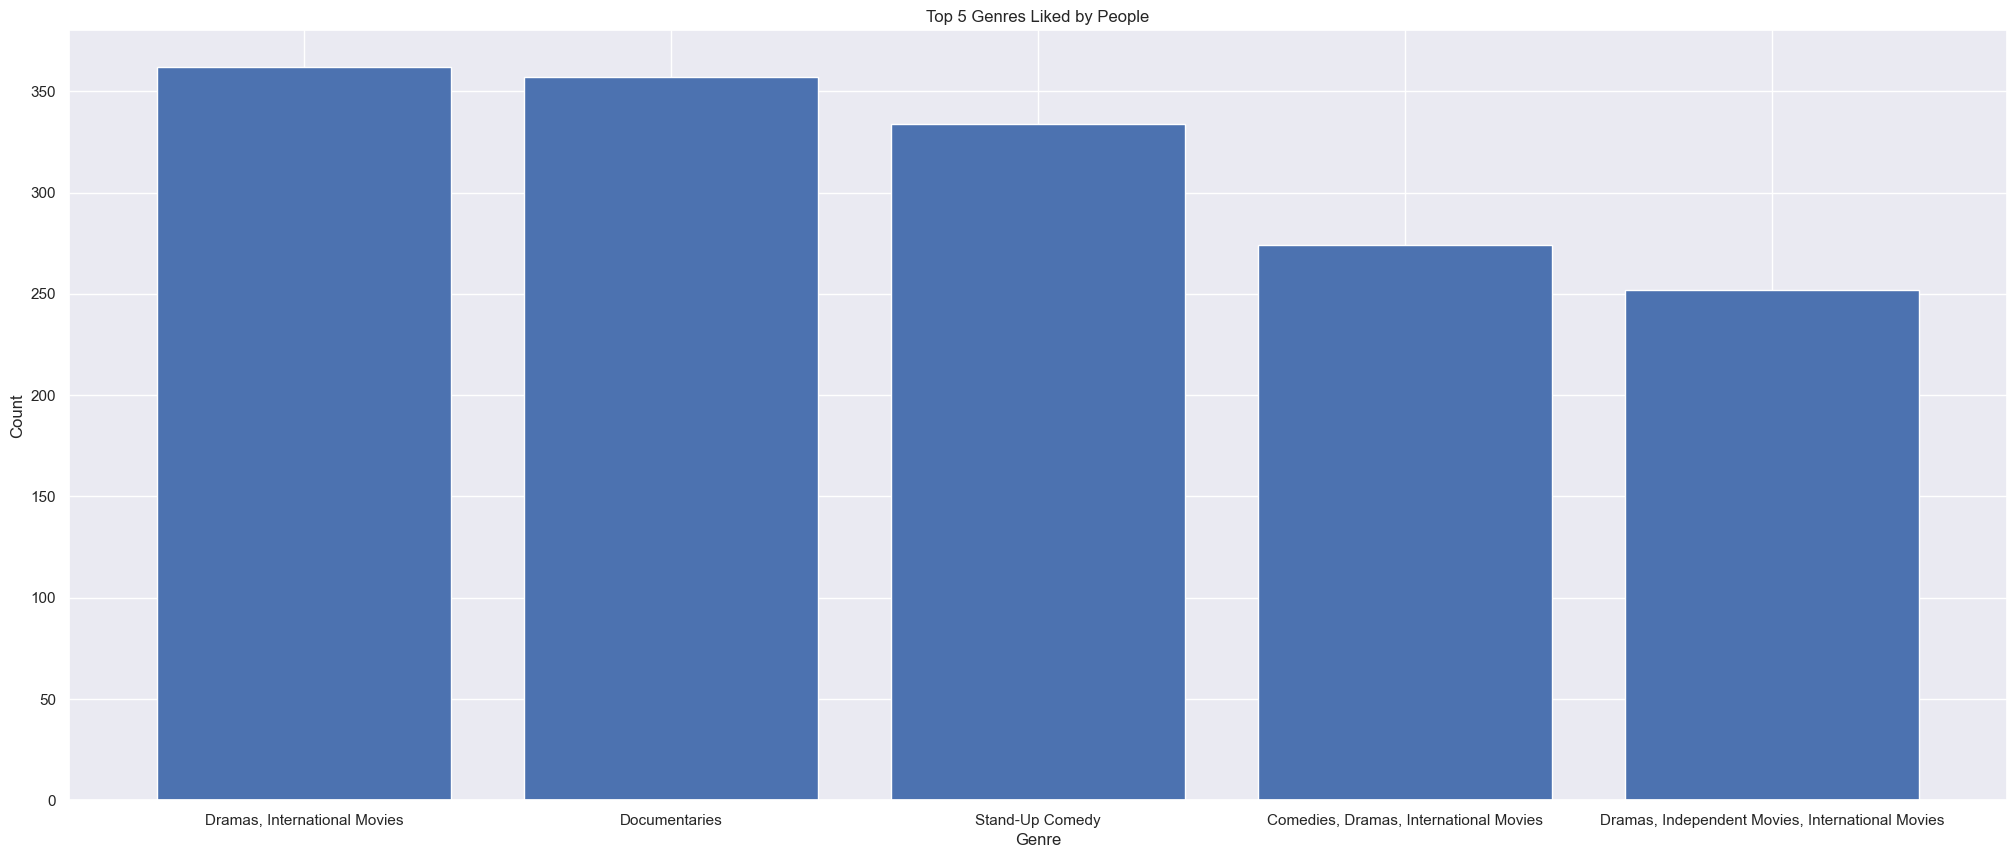

In [140]:
plt.figure(figsize=(25, 10))
plt.bar(top_genres.index, top_genres.values)
plt.title('Top 5 Genres Liked by People')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# c. Which 2 directors should Netflix collaborate with more based on the increase in their movies or tv shows over the past years?

In [141]:
# Group the dataset by director and count the number of movies and TV shows they have worked on in each year

director_counts = df.groupby(["Director", "Release_year"])["Title"].count().reset_index()
director_counts.columns = ["Director", "Release_year", "Count"]
director_counts

,Director,Release_year,Count
0,A. L. Vijay,2016,1
1,A. L. Vijay,2019,1
2,A. Raajdheep,2020,1
3,A. Salaam,1975,1
4,A.R. Murugadoss,2017,1
...,...,...,...
5946,Óskar Thór Axelsson,2017,1
5947,Ömer Faruk Sorak,2004,1
5948,Ömer Faruk Sorak,2011,1
5949,Şenol Sönmez,2015,1


In [142]:
# Sort the directors by the change in the number of movies and TV shows they have worked on over the past years

director_changes = []
for director in director_counts["Director"].unique():
    counts = director_counts[director_counts["Director"] == director]["Count"]
    change = counts.iloc[-1] - counts.iloc[0]
    director_changes.append({"Director": director, "Change": change})

sorted_directors = pd.DataFrame(director_changes).sort_values("Change", ascending=False)
sorted_directors

,Director,Change
4303,Unknown,261
3443,"Raúl Campos, Jan Suter",9
1586,Hidenori Inoue,4
2701,Matt Askem,3
4046,Suhas Kadav,2
...,...,...
553,Blair Simmons,-1
3825,Sermiyan Midyat,-1
462,Barak Goodman,-1
2810,Michael McKay,-2


In [143]:
# Get the top 2 directors with the most increase in movies and TV shows over the past years

top_directors = sorted_directors.head(3) # Displaying top 3 directors because the 1st director is "unknown"
top_directors

,Director,Change
4303,Unknown,261
3443,"Raúl Campos, Jan Suter",9
1586,Hidenori Inoue,4


# d. Which are the top 10 actors who are liked by people and have the most content on the Netflix OTT platform.

In [144]:
# Count the number of times each actor appears in the "Cast" column
actor_counts = df['Cast'].str.split(', ').explode().value_counts()

# Get the top 10 actors with the highest counts
top_10_actors = actor_counts.head(10)

top_10_actors

Unknown             729
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Akshay Kumar         30
Om Puri              30
Yuki Kaji            29
Name: Cast, dtype: int64

Visualization

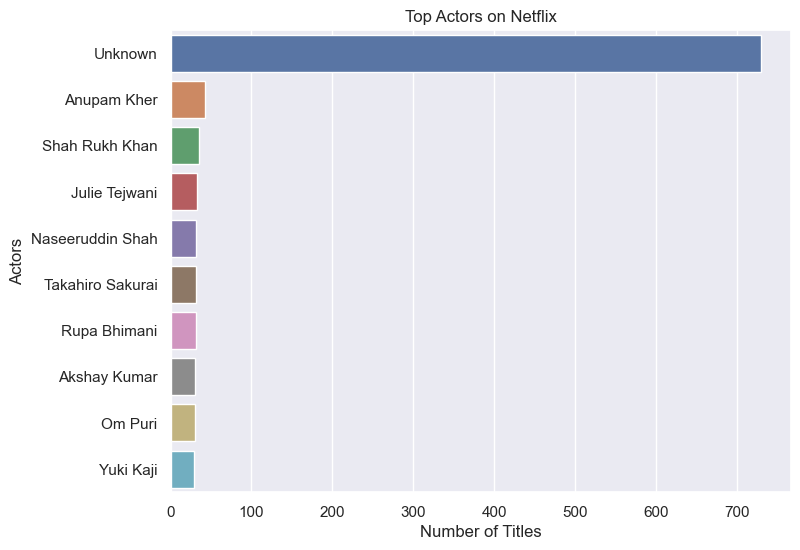

In [145]:
plt.figure(figsize=(8,6))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index)
plt.title('Top Actors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actors')
plt.show()

# e. Which 2 actors should Netflix collaborate with more based on the increase in their movies or tv shows over the past years?

In [146]:
# Split the Cast column into multiple actors
df["Cast"] = df["Cast"].str.split(", ")
df.head()

,Type,Title,Director,Cast,Country,Release_year,Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,[Unknown],United States,2020,Documentaries
1,TV Show,Blood & Water,Unknown,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",Unknown,2021,"Crime TV Shows, International TV Shows, TV Act..."
4,TV Show,Kota Factory,Unknown,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,2021,"International TV Shows, Romantic TV Shows, TV ..."
5,TV Show,Midnight Mass,Mike Flanagan,"[Kate Siegel, Zach Gilford, Hamish Linklater, ...",Unknown,2021,"TV Dramas, TV Horror, TV Mysteries"


In [147]:
# Explode the Cast column to create a new row for each actor in a movie or TV show
df = df.explode("Cast")
df.head()

,Type,Title,Director,Cast,Country,Release_year,Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,Documentaries
1,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
1,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
1,TV Show,Blood & Water,Unknown,Gail Mabalane,South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
1,TV Show,Blood & Water,Unknown,Thabang Molaba,South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"


In [148]:
# Group the dataset by actor and count the number of movies and TV shows they have worked on in each year
actor_counts = df.groupby(["Cast", "Release_year"])["Title"].count().reset_index()
actor_counts.columns = ["Actor", "Release_year", "Count"]
actor_counts

,Actor,Release_year,Count
0,Jr.,2017,1
1,Jr.,2020,1
2,"""Riley"" Lakdhar Dridi",2019,1
3,'Najite Dede,2013,1
4,'Najite Dede,2016,1
...,...,...,...
58073,Şinasi Yurtsever,2015,1
58074,Şükran Ovalı,2016,1
58075,Şükrü Özyıldız,2014,1
58076,Şükrü Özyıldız,2016,1


In [149]:
# Sort the actors by the change in the number of movies and TV shows they have worked on over the past years
actor_changes = []
for actor in actor_counts["Actor"].unique():
    counts = actor_counts[actor_counts["Actor"] == actor]["Count"]
    change = counts.iloc[-1] - counts.iloc[0]
    actor_changes.append({"Actor": actor, "Change": change})

sorted_actors = pd.DataFrame(actor_changes).sort_values("Change", ascending=False)
sorted_actors

,Actor,Change
34214,Unknown,64
8028,David Spade,9
10759,Fortune Feimster,9
20071,London Hughes,8
17462,Kathleen Barr,6
...,...,...
21701,Marsai Martin,-3
31327,Smith Foreman,-3
13386,Indrans,-4
27356,Rajesh Kawa,-5


In [150]:
# Get the top 2 actors with the most increase in movies and TV shows over the past years

top_actors = sorted_actors.head(4) # Displaying top 4 actors because the 1st actor is "unknown" & the next two have same change
top_actors

,Actor,Change
34214,Unknown,64
8028,David Spade,9
10759,Fortune Feimster,9
20071,London Hughes,8


Visualization